In [225]:
import yfinance as yf

equity = "BAJAJFINSV.NS"

yfinancedf = yf.download(equity, interval="1m", period="1d")
yfinancedf.columns = yfinancedf.columns.get_level_values(0)

df = yfinancedf.copy()
df['Time'] = df.index


[*********************100%***********************]  1 of 1 completed


In [226]:
df.head()

Price,Close,High,Low,Open,Volume,Time
Datetime,,,,,,
2025-05-02 03:45:00+00:00,1947.000000,1955.000000,1946.800049,1955.000000,0,2025-05-02 03:45:00+00:00
2025-05-02 03:46:00+00:00,1937.500000,1946.900024,1931.300049,1946.900024,31158,2025-05-02 03:46:00+00:00
2025-05-02 03:47:00+00:00,1942.800049,1945.800049,1937.199951,1937.199951,25553,2025-05-02 03:47:00+00:00
2025-05-02 03:48:00+00:00,1946.400024,1947.000000,1940.800049,1944.000000,11716,2025-05-02 03:48:00+00:00
2025-05-02 03:49:00+00:00,1945.599976,1947.800049,1942.599976,1947.800049,9623,2025-05-02 03:49:00+00:00


In [227]:
import pandas_ta as ta
import numpy as np

# 1st
df['rsi'] = ta.rsi(close=df['Close'], length=14)

# 2nd
df['slope'] = (df['Close'] - df['Close'].shift(5)) / 5

df['future_slope'] = (df['Close'] - df['Close'].shift(-5)) / 5
df['average_volume'] = df['Volume'].rolling(window=5).mean()

# 3rd
df['spike'] = df['Volume'] / df['average_volume']

# Labelling correct dips , we can adjust these to increase the number of dips in the current data.
# Making it more specific will lead to heavy target class imbalance.

rsi_threshold = 50
slope_threshold = -0.1
future_slope_threshold = 0.1
spike_threshold = 1.2


df['is_correct_dip'] = (
  (df['rsi'] < rsi_threshold) &
  (df['slope'] < slope_threshold) &
  (df['future_slope'] > future_slope_threshold) &
  (df['spike'] > spike_threshold)
).astype(int)

df = df.dropna()



In [228]:
df.head(10)

Price,Close,High,Low,Open,Volume,Time,rsi,slope,future_slope,average_volume,spike,is_correct_dip
Datetime,,,,,,,,,,,,
2025-05-02 03:59:00+00:00,1942.099976,1943.199951,1940.599976,1940.599976,5184,2025-05-02 03:59:00+00:00,48.227861,0.800000,-0.480005,5572.8,0.930233,0
2025-05-02 04:00:00+00:00,1944.000000,1944.000000,1942.000000,1942.599976,5525,2025-05-02 04:00:00+00:00,53.071262,0.800000,0.539990,5587.4,0.988832,0
2025-05-02 04:01:00+00:00,1941.599976,1946.599976,1941.300049,1946.099976,6461,2025-05-02 04:01:00+00:00,47.079834,0.200000,-0.380005,5161.6,1.251744,0
2025-05-02 04:02:00+00:00,1944.400024,1944.900024,1940.099976,1941.599976,3472,2025-05-02 04:02:00+00:00,53.653697,0.980005,0.180005,4607.4,0.753570,0
2025-05-02 04:03:00+00:00,1941.400024,1944.500000,1940.800049,1943.699951,2477,2025-05-02 04:03:00+00:00,46.927532,0.340015,0.340015,4623.8,0.535707,0
2025-05-02 04:04:00+00:00,1944.500000,1944.500000,1942.099976,1942.400024,2346,2025-05-02 04:04:00+00:00,53.424977,0.480005,1.139990,4056.2,0.578374,0
2025-05-02 04:05:00+00:00,1941.300049,1943.199951,1941.300049,1942.500000,2643,2025-05-02 04:05:00+00:00,47.025085,-0.539990,0.260010,3479.8,0.759526,0
2025-05-02 04:06:00+00:00,1943.500000,1944.000000,1941.000000,1941.800049,1878,2025-05-02 04:06:00+00:00,51.340753,0.380005,0.900000,2563.2,0.732678,0
2025-05-02 04:07:00+00:00,1943.500000,1943.500000,1941.400024,1943.400024,1657,2025-05-02 04:07:00+00:00,51.340753,-0.180005,0.680005,2200.2,0.753113,0


In [229]:
# Checking the distribution.

df['is_correct_dip'].value_counts()

is_correct_dip
0    340
1     16
Name: count, dtype: int64

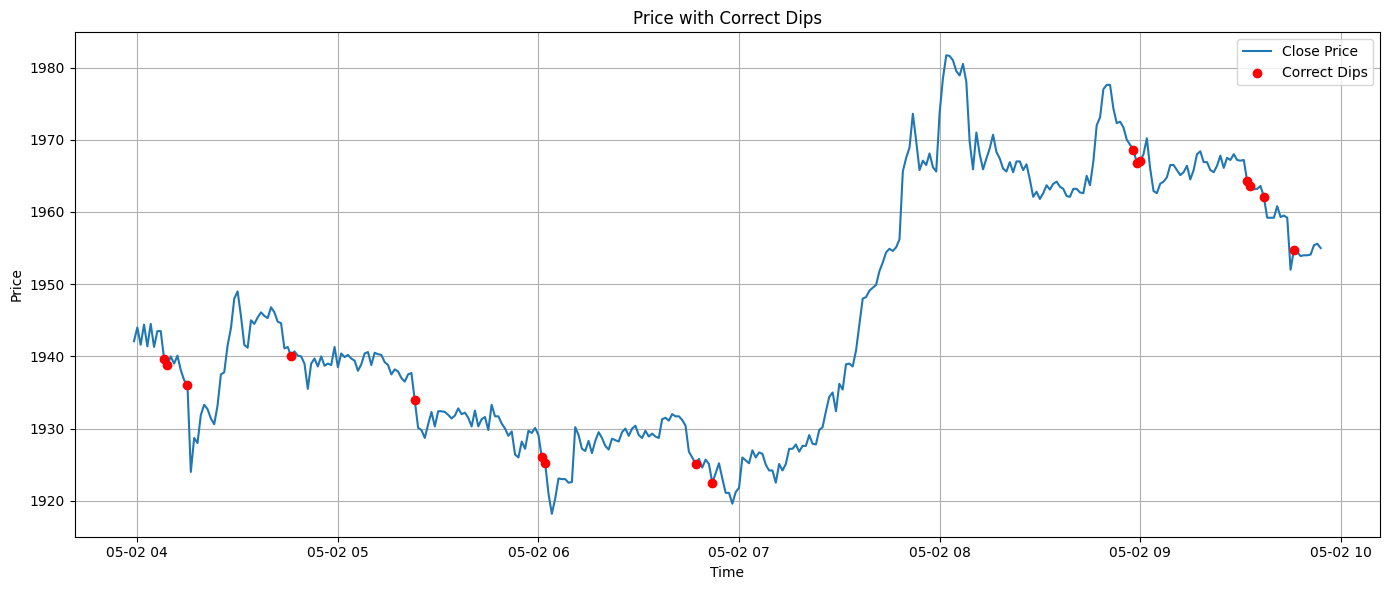

In [230]:
# Now try to plot the points where we are getting is_correct_dip

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['Time'], df['Close'], label='Close Price', linewidth=1.5)

dip_points = df[df['is_correct_dip'] == 1]
plt.scatter(dip_points['Time'], dip_points['Close'], color='red', label='Correct Dips', zorder=5)

plt.title('Price with Correct Dips')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()